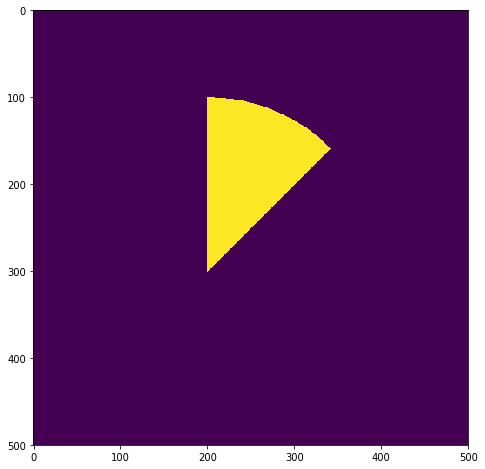

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


def make_ray_mask(img, xy_center, start_angle=-1, end_angle=-1):

    bg = np.zeros_like(img)
    if start_angle == -1 and end_angle == -1: 
        return bg
    elif start_angle < 0 or end_angle < 0:
        raise ValueError("Angle cannot be negative!")

    if start_angle > end_angle:
      start_angle -= 360
    radius = int(min(xy_center[0], xy_center[1], img.shape[0]-xy_center[1], img.shape[1]-xy_center[0]))
    cv.ellipse(bg, xy_center, axes=(radius, radius), angle=-90, startAngle=start_angle, endAngle=end_angle,
               color=255, thickness=-1)

    return bg

  
'''
img = np.zeros((500,500))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=0, end_angle=45))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=0, end_angle=15))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=345, end_angle=0))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=15, end_angle=40))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=40, end_angle=15))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=-1, end_angle=-1))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=120, end_angle=260))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=260, end_angle=120))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=320, end_angle=10))
_, ax = plt.subplots(figsize=(16, 8))
ax.imshow(make_ray_mask(img, (200,300), start_angle=10, end_angle=320))
'''

pass

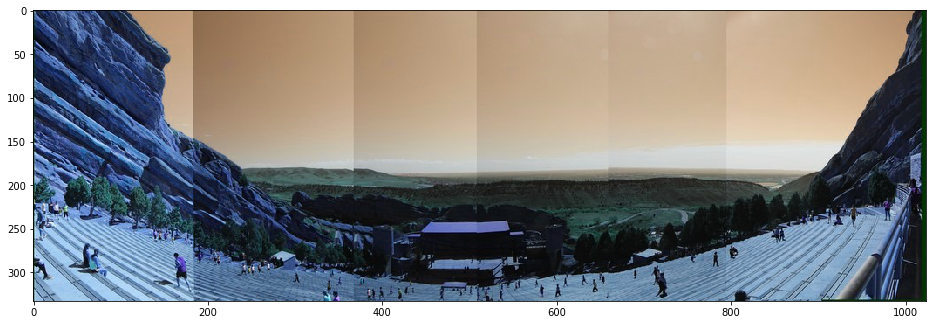

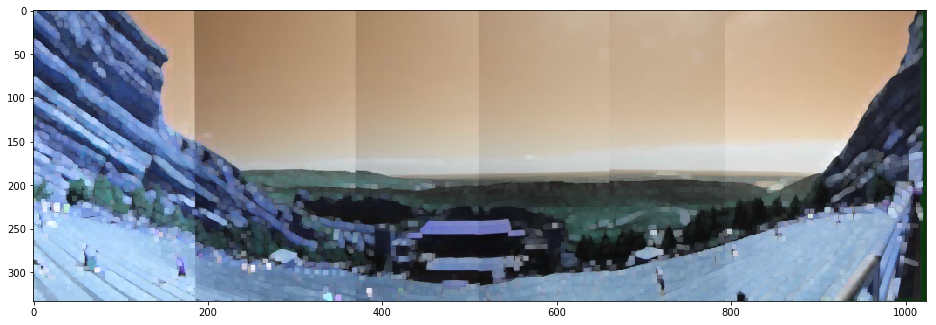

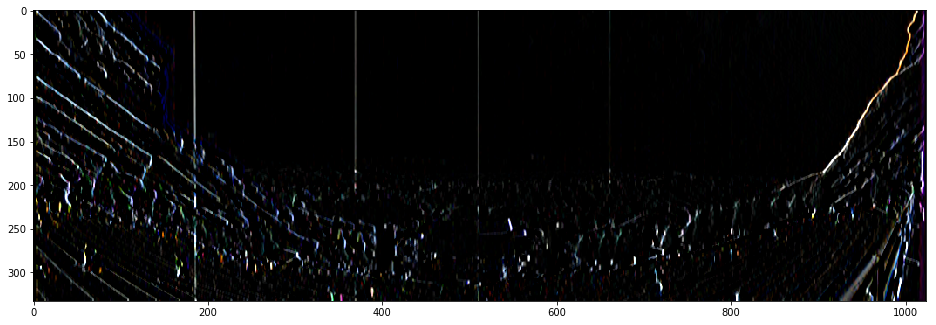

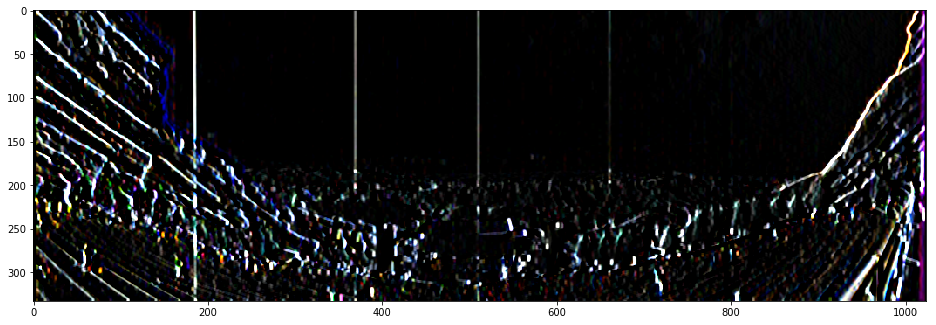

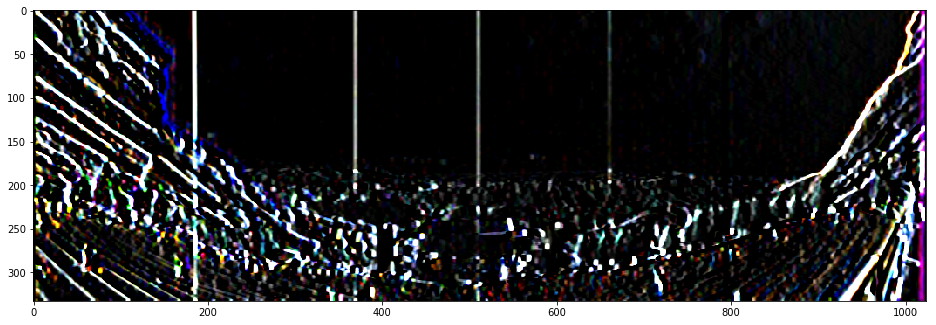

In [36]:
def panel_filter(filename):
  img = cv.imread(filename, cv.IMREAD_COLOR)
  kernel_array = []
  
  kernel_array.append([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
  ])
  kernel_array.append([
    [1,1,0,-1,-1],
    [1,1,0,-1,-1],
    [1,1,0,-1,-1]
  ])
  kernel_array.append([
    [1,1,1,0,-1,-1,-1],
    [1,1,1,0,-1,-1,-1],
    [1,1,1,0,-1,-1,-1]
  ])

  _, ax = plt.subplots(figsize=(16, 8))
  ax.imshow(img)
  
  img = cv.dilate(img,np.ones((5,5),np.uint8),iterations = 1)
  _, ax = plt.subplots(figsize=(16, 8))
  ax.imshow(img)
  
  for a_kernel in kernel_array:
    kernel = np.array(a_kernel)
    img1 = cv.filter2D(img, -1, kernel)
    _, ax = plt.subplots(figsize=(16, 8))
    ax.imshow(img1)

panel_filter("/Users/faustynka/Downloads/panorama.jpg")

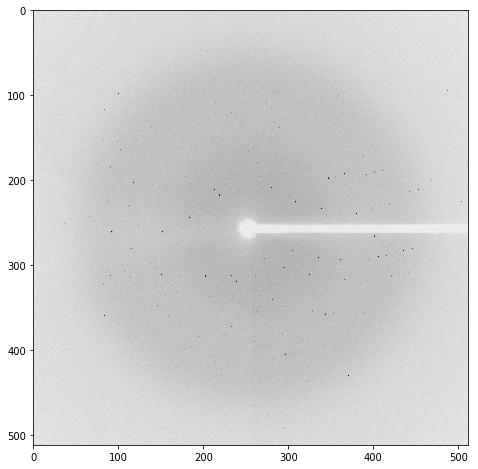

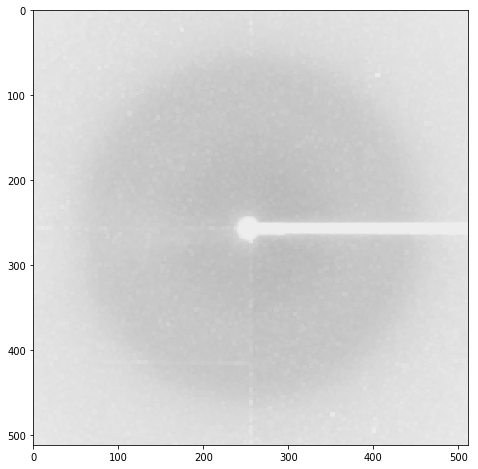

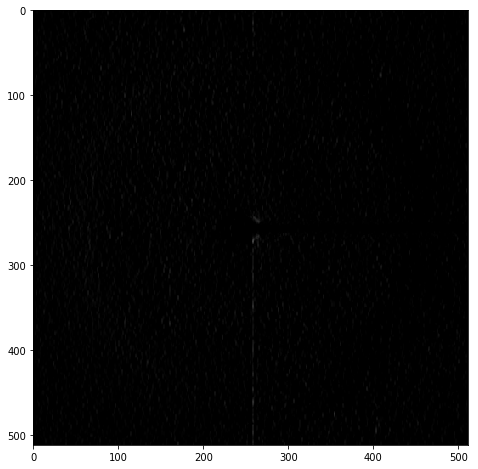

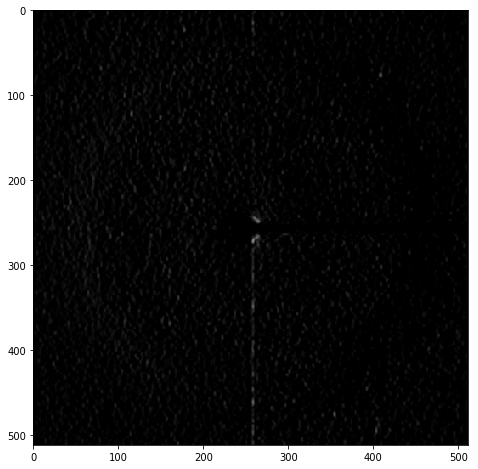

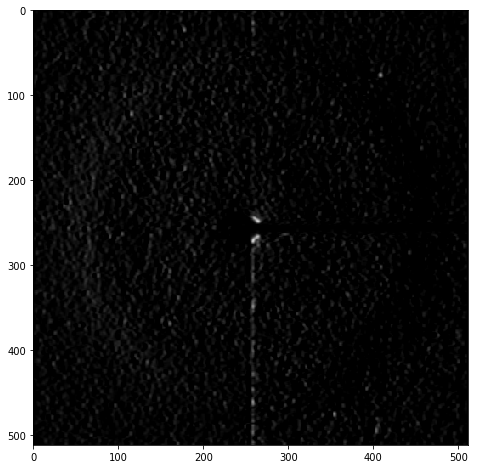

In [37]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/16c35p2_1_E1_001.png")

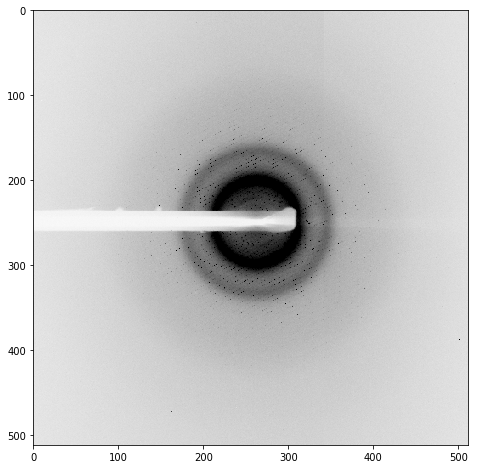

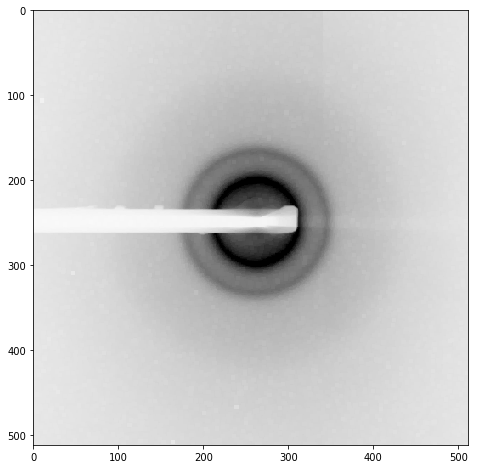

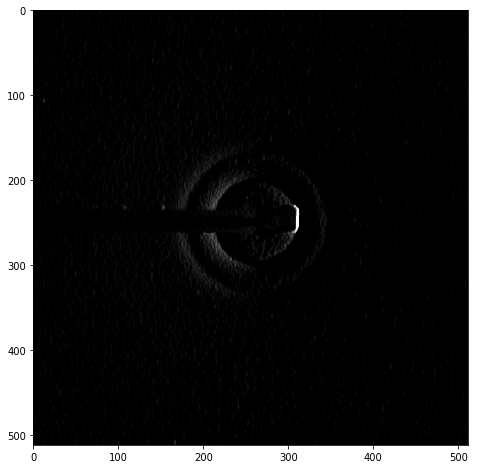

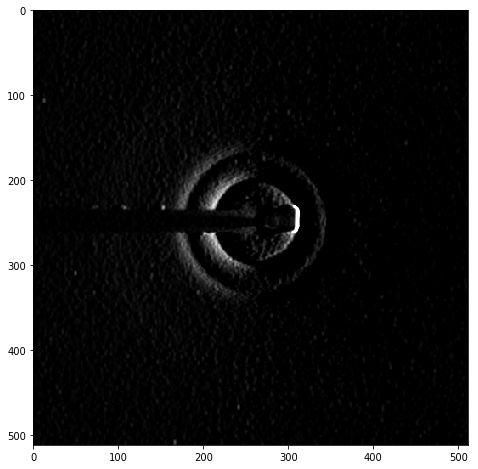

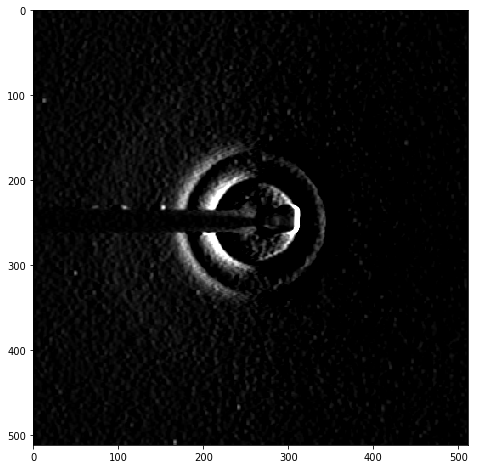

In [38]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/24-d30-1.0001.png")

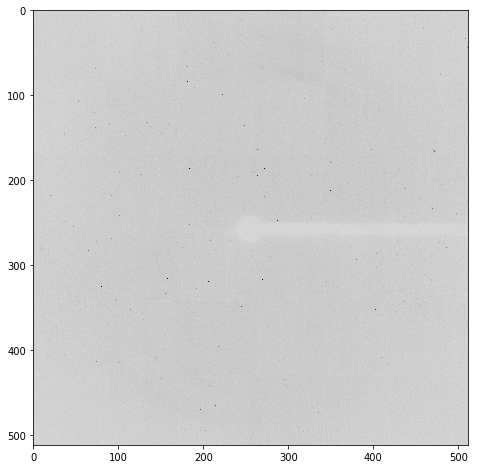

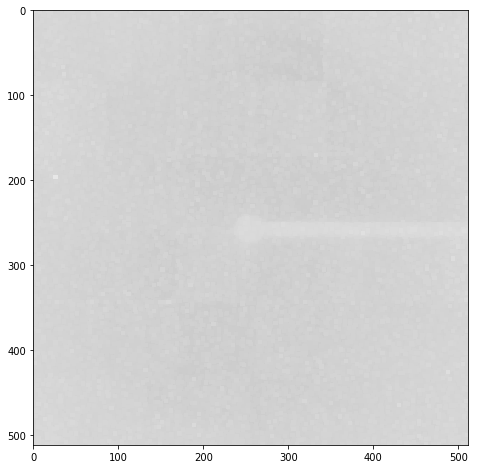

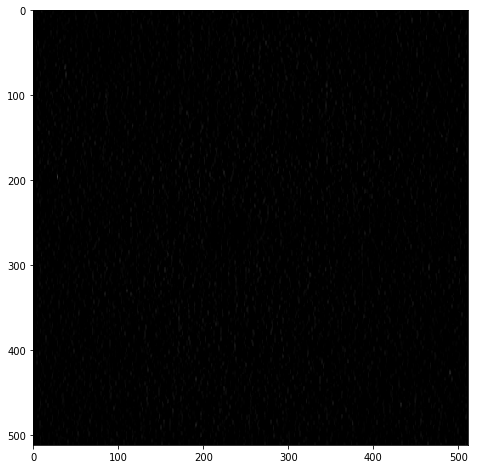

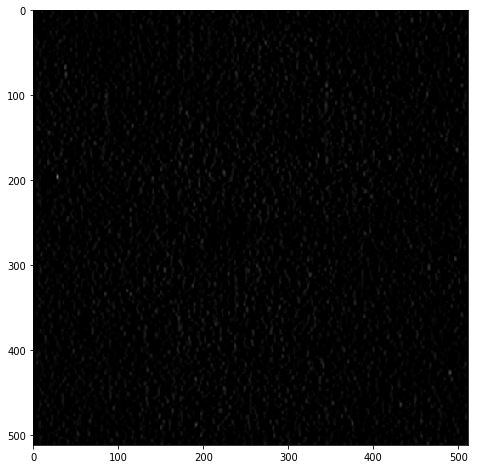

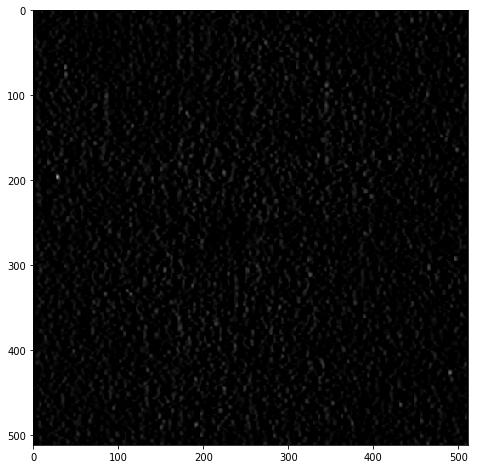

In [39]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/25c22p3_1_E1_001.png")

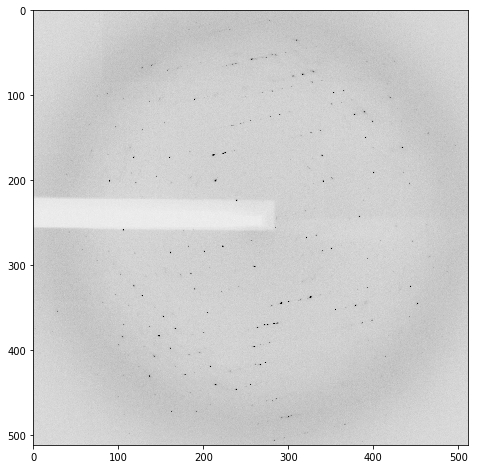

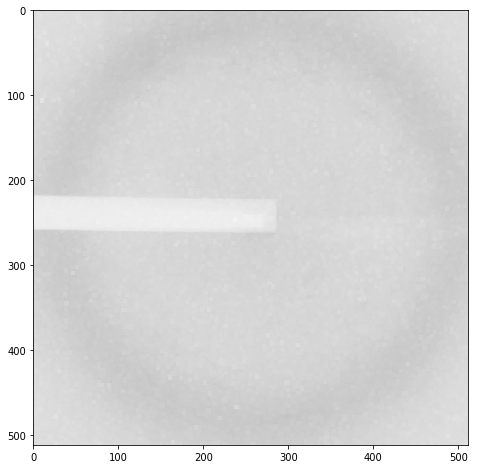

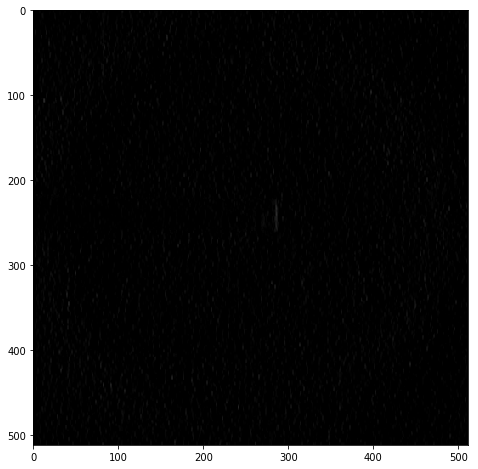

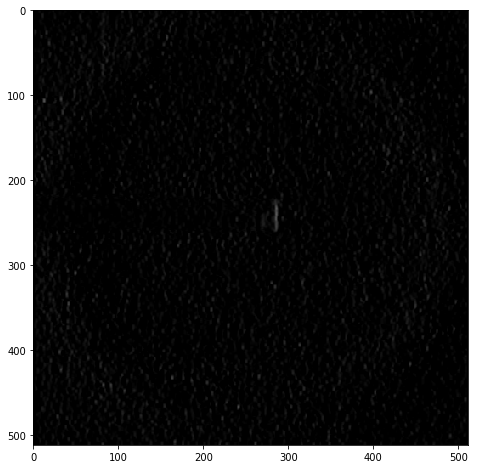

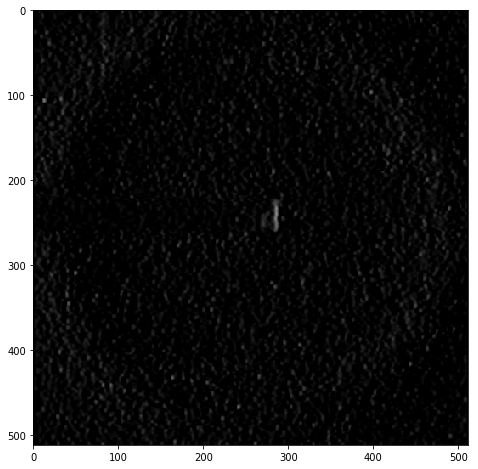

In [40]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/1077_M1_F1_2_low.0001.png")

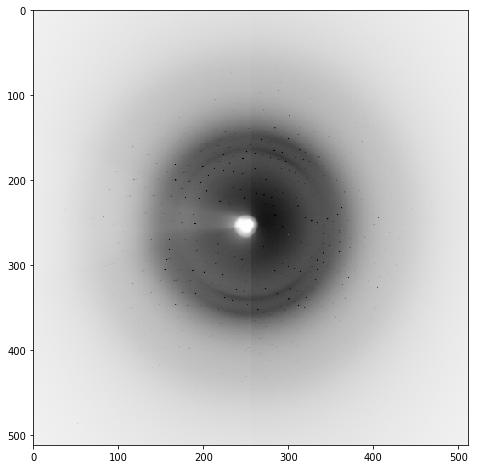

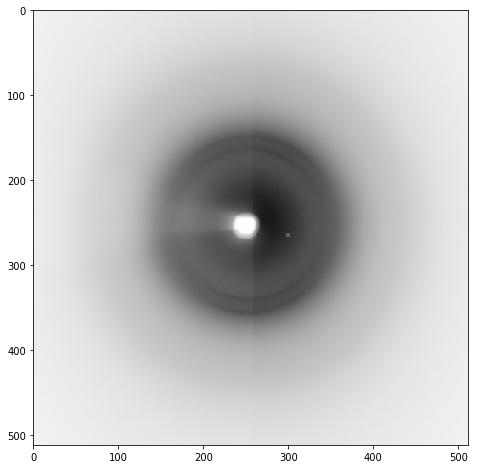

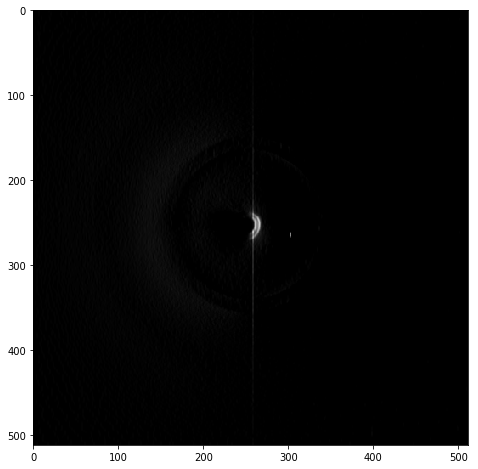

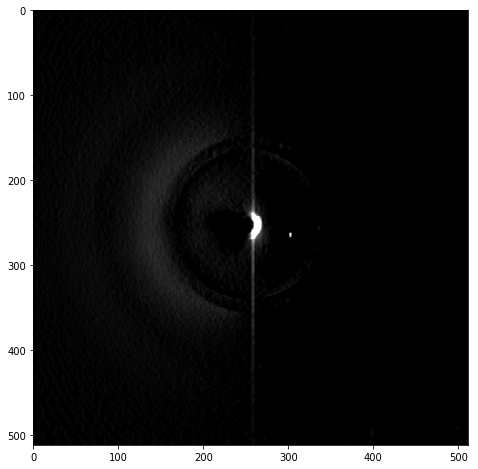

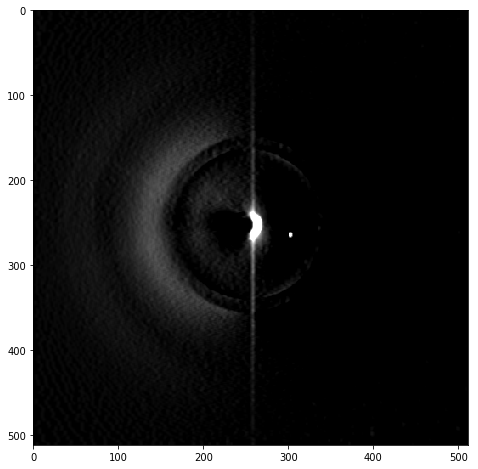

In [41]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/2997_1_001.png")

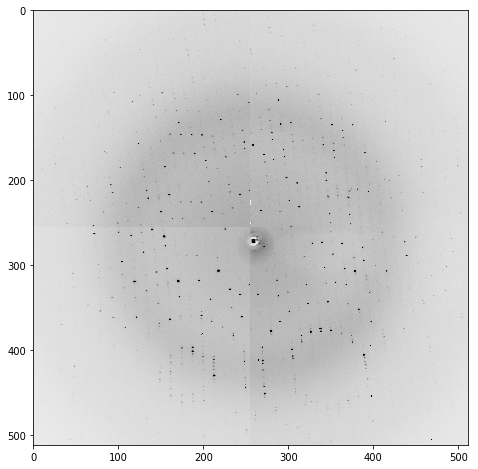

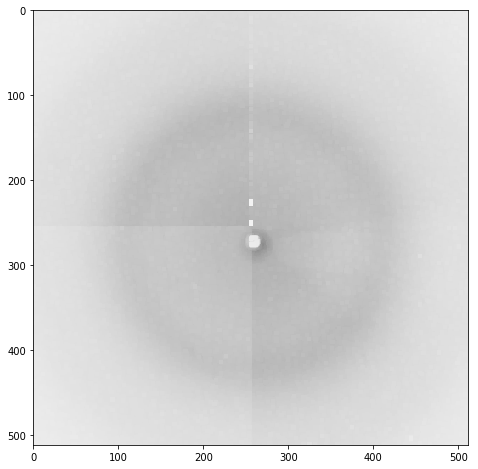

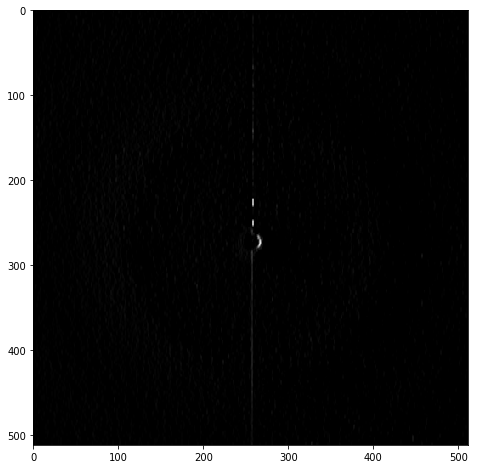

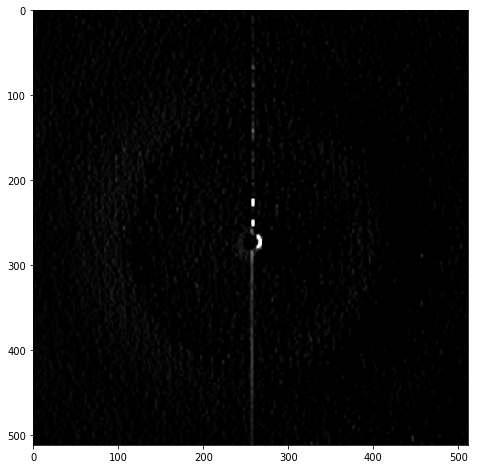

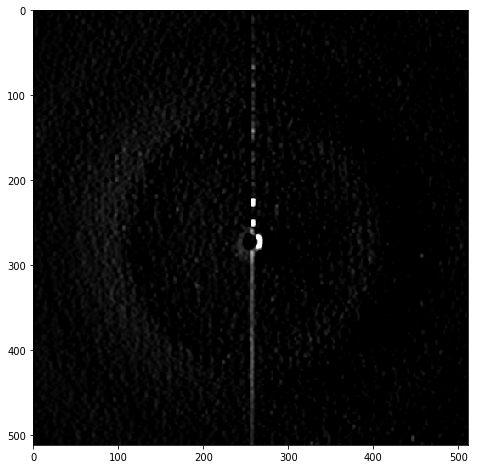

In [42]:
panel_filter("/Volumes/Alice/reflex-data/reflex_img_512_inter_nearest/9822_1_001.png")

In [26]:
import pandas as pd

def split_csv(filename, proportions=(0.8, 0.1, 0.1)):
    
    assert filename[filename.rfind('.'):] == '.csv'
    assert len(proportions) == 3
    assert sum(proportions) == 1
    
    orig_df = pd.read_csv(filename, index_col=0)
    shuffled_df = orig_df.sample(frac=1)
    
    filename_core = filename[:filename.rfind('.')]
    train_filename = f'{filename_core}_train.csv'
    val_filename = f'{filename_core}_val.csv'
    test_filename = f'{filename_core}_test.csv'
    
    thresh1 = int(proportions[0]*len(shuffled_df))
    thresh2 = thresh1 + int(proportions[1]*len(shuffled_df))
    
    full_df[:thresh1].to_csv(train_filename)
    full_df[thresh1:thresh2].to_csv(val_filename)
    full_df[thresh2:].to_csv(test_filename)

In [27]:
split_csv('asdf.csv')